# Homework 5 (100 Points)

For this homework we’ll be working with two years of the bicycle sharing systems for New York City (Citibike). The dataset contains daily bike trip counts, along with daily measurements on environmental and seasonal information that may affect the bikesharing.

Here’s information on what the variables mean.

- trips - daily total number of bike trips taken (all stations)
- precipitation - daily inches of rain
- snow_depth - daily inches of snow. Accoding to NOAA "Determine the depth of the new and old snow remaining on the ground at observation time".
- snowfall - according to NOAA "Measure and record the snowfall (snow, ice pellets ) since the previous snowfall observation (24 hours)."
- max_temperature - daily maximum temperature in Farenheit (highest temperature reached)
- min_temperature - daily minimum temperature in Farenheit (lowest temperature reached)
- average_wind_speed - measured hourly in mph and averaged for daily value
- year 
- holiday
    - True
    - False
- stations in service - docking stations working per day
- weekday
    - True
    - False
- weekday_non_holiday
    - True
    - False

More details on snow measurements [here](https://www.weather.gov/gsp/snow)

In [1]:
# All the libraries that we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline

## Exercise 1: Data pre-processing (16 pts)

Let's start by loading and pre-processing our dataset.

a) Load the `bikes` dataset into a dataframe called `bikes`, and print the first five rows [2pt]

In [2]:
bikes = pd.read_csv('citibike.csv')
bikes.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,False,329,False,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,False,329,False,False
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True


b) Check that there are no missing values in your dataset. If they are, take care of them appropriately [2pt]


In [3]:
bikes.dropna(axis=0, how='any', inplace=True)

c) Separate your dataset into two dataframes. One dataframe should contain the data for weekends and the other one for weekdays [4pt]

In [4]:
weekends, weekdays = bikes[bikes['weekday'] == False], bikes[bikes['weekday']
                                                             == True]

d) Let's look at the number of bicycle rental (trips) per season! Draw a boxplot that displays this information for the whole dataset. As subplots, draw the boxplots for weekdays and weekends. Is there a differece in the distribution of trips between seasons? Is there a difference between weekdays and weekends? Explain. [8pts]

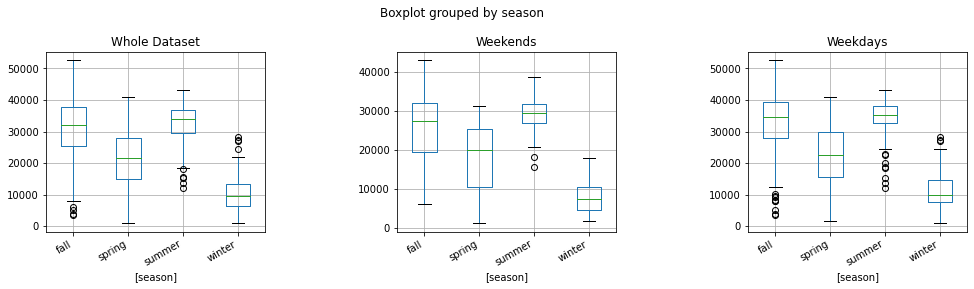

In [5]:
fig, ax = plt.subplots(1, 3)
bikes.boxplot(column=['trips'], by=['season'], ax=ax[0])
ax[0].set_title('Whole Dataset')

weekends.boxplot(column=['trips'], by=['season'], ax=ax[1])
ax[1].set_title('Weekends')

weekdays.boxplot(column=['trips'], by=['season'], ax=ax[2])
ax[2].set_title('Weekdays')

fig.tight_layout()
fig.autofmt_xdate()
fig.set_figwidth(15)

--> People tend to take trips more during the summer and fall, and mostly on weekdays rather than weekends.

## Exercise 2: Qualitative predictors (18 pts)

The Season variable is an example of what’s called a categorical predictor. This problem gets to fit a model with a qualitative predictor and to interpret the findings.

a) Fit a linear regression model with trips as the response(dependent) variable and season as your predictor(independent), and print the summary of this linear regression model. Use your weekdays dataset [4pt]


In [6]:
import statsmodels.formula.api as smf

In [7]:
model = smf.ols(formula='trips ~ season', data=weekdays).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     261.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.07e-108
Time:                        20:13:04   Log-Likelihood:                -6333.7
No. Observations:                 608   AIC:                         1.268e+04
Df Residuals:                     604   BIC:                         1.269e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.353e+04    581.221  

b) How many total coefficients are there in the model? What does each coefficient correspond to? [4pt]

--> We have 3 coefficients and an intercept. The coefficients correspond to how much the dependent variable will change if the independent variable changes. 
    
If the coefficient is negative, the independent and dependent variables have an inverse relationship.

The intercept is the y-intercept. It means that if all other coefficients are zero, then the expected output would be equal to the intercept.

c) Interpret the coefficients of season in the model. Make sure to use an example in your interpretation, related to the bikes [4pt]

--> If the current season is `summer`, then the amount of trips on bikes will be larger, but since the p-value is large this means that this season is not statistically significant.

However, if the current season is `spring` or `winter`, then the number of trips taken will be smaller.

d) Repeat a) -> c) with your weekends dataset. What difference can you see? [6pt]

In [8]:
model = smf.ols(formula='trips ~ season', data=weekends).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     104.5
Date:                Tue, 10 May 2022   Prob (F-statistic):           4.01e-43
Time:                        20:13:04   Log-Likelihood:                -2468.5
No. Observations:                 241   AIC:                             4945.
Df Residuals:                     237   BIC:                             4959.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           2.6e+04    785.775  

--> The `summer` season is still positively correlated to `trips`, and the p-value is small so it indicates that there is a strong relationship, unlike the weekdays dataset.

The `spring` and `winter` seasons are still inversely correlated to `trips`.

## Exercise 3: Multiple linear regression (16 pts)

In this problem we’ll practice fitting and interpreting the results of a multiple linear regression. For this question use the weekdays dataset.

a) Fit a regression model with trips as the response variable and the following predictors as features: snow_depth, snowfall, min_temperature, max_temperature, precipitation, month [4pt]


In [9]:
model = smf.ols(
    formula=
    'trips ~ snow_depth + snowfall + min_temperature + max_temperature + precipitation + month',
    data=weekdays).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     332.2
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.70e-187
Time:                        20:13:04   Log-Likelihood:                -6142.1
No. Observations:                 608   AIC:                         1.230e+04
Df Residuals:                     601   BIC:                         1.233e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5252.4304   1205.888     

b) Interpret the coefficients of snow_depth, snowfall, min_temperature, max_temperature, precipitation, month in the model [4pt]

--> The `snow_depth`, `snowfall`, `min_temperature`, and `precipitation` are all inversely correlated to the amount of trips. The `max_temperature` and `month` are positively correlated to the amount of trips.

However, the p-index indicates that `snowfall` and `min_temperature` do not have a strong linear relationship to `trips`, which means that they are statistically insignificant.

c) Re-run the model from 3 a) but add another predictor of your choice. Justify your choice of predictor. Did this make any difference? Did the R-squared of the model improve? [4pt]

In [10]:
model = smf.ols(
    formula=
    'trips ~ snow_depth + snowfall + min_temperature + max_temperature + precipitation + month + holiday',
    data=weekdays).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     339.7
Date:                Tue, 10 May 2022   Prob (F-statistic):          5.11e-204
Time:                        20:13:04   Log-Likelihood:                -6099.6
No. Observations:                 608   AIC:                         1.222e+04
Df Residuals:                     600   BIC:                         1.225e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4140.1613   1131.658     

--> I added the `holiday` to the model and the R-squared metric has increased, which means that the model has a better fit than the one in a).

d) From c) which predictors are associated with increased ridership? Which predictors are associated with decreased ridership? [2pt]

--> The `snow_depth`, `snowfall`, `min_temperature`, `holiday`, and `precipitation` are associated with decreased ridership. `max_temperature` and `month` are associated with increased ridership.

e) Which predictors are statistically significant (95% confidence level)? [2pt]

--> `holiday`, `snow_depth`, `max_temperature`, `precipitation`, and `month`

## Exercise 4: Dealing with collinearity (12 pts)

Highly correlated predictors can make interpreting regression coefficients problematic (they do not contribute relevant information for the model). Let’s evaluate this in our dataset. Continue using weekdays as your main dataset.

a) Check the variables used in Problem 3 a) to see if any of the predictors are highly correlated with one another. [2pt]


In [11]:
corr_mat = weekdays[['snow_depth', 'snowfall', 'min_temperature', 'max_temperature', 'precipitation', 'month']].corr()
s = set()
for col, data in corr_mat.items():
    for index, val in data.items():
        if val >= 0.7 and col != index:
            s.add(tuple(sorted((index, col))))

print(s)

{('max_temperature', 'min_temperature')}


--> `max_temperature` and `min_temperature` are highly correlated.

b) Are any of the predictors highly correlated? Are you surprised that these predictors are highly correlated, or can you think of a reason for why it makes sense that they should be correlated? [2pt]

--> No suprise that these predictors are highly correlated, since if the temperature goes up so does the min and max temperatures.

c) Fit your regression model, but this time omit the max or min temperature variable. Display the coefficients table for this model. [4pt]

In [12]:
model = smf.ols(
    formula=
    'trips ~ snow_depth + snowfall + max_temperature + precipitation + month',
    data=weekdays).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     399.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.80e-188
Time:                        20:13:04   Log-Likelihood:                -6142.1
No. Observations:                 608   AIC:                         1.230e+04
Df Residuals:                     602   BIC:                         1.232e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5144.3465   1081.924     

d) What is the coefficient of temperature in this new model? Is it very different from the temperature coefficient estimated in part 3)a)? Is it statistically significant? Explain your findings. [4pt]

--> The coefficients is relatively the similar to the one in 3a. It is statistically significant, since the p-index is 0.

## Exercise 5: Exploring different models (38 pts)

*Continue using weekdays as your dataset.*

a) Construct a scatterplot of trips ~ month. Describe what you see. Does a linear relationship appear to be a good way of modeling how bikeshare count varies with month? [4pts]

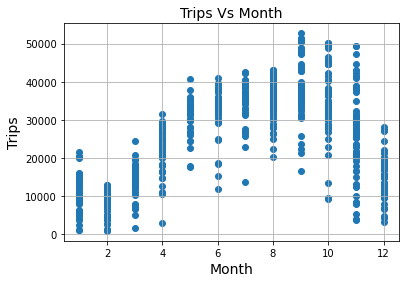

In [13]:
plt.scatter(weekdays['month'], weekdays['trips'])
plt.title('Trips Vs Month', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Trips', fontsize=14)
plt.grid(True)
plt.show()

--> The relationship of `trips` to `month` is not linear, it is more cubic.

b) Try out 3 different degrees of polynomial regression fits for modeling the relationship between trips and month. Do not do more than 3 models. Display all of them in the same plot (through subplots). Choose the subplot that appears to nicely capture the trends in the data. Be sure to print the $R^2$ or adjusted-$R^2$ for each subplot to help you with your decision. Explain your choice and include comments to explain your code. [8pts]

In [14]:
def testPolynomials(df, x, y):
    linearEq = y + ' ~ ' + x
    quadEq = linearEq + ' + I(' + x + '**2)'
    cubEq = quadEq + ' + I(' + x + '**3)'

    linear = smf.ols(formula=linearEq, data=df).fit()
    quadratic = smf.ols(formula=quadEq, data=df).fit()
    cubic = smf.ols(formula=cubEq, data=df).fit()

    fig, ax = plt.subplots(1, 3)
    fig.suptitle(x + ' vs ' + y)
    ax[0].set_title('Linear, R-squared: ' + str(round(linear.rsquared, 3)))
    sns.regplot(x=x,
                y=y,
                data=df,
                order=1,
                ax=ax[0],
                line_kws={"color": "red"})

    ax[1].set_title('Quadratic, R-squared: ' +
                    str(round(quadratic.rsquared, 3)))
    sns.regplot(x=x,
                y=y,
                data=df,
                order=2,
                ax=ax[1],
                line_kws={"color": "red"})

    ax[2].set_title('Cubic, R-squared: ' + str(round(cubic.rsquared, 3)))
    sns.regplot(x=x,
                y=y,
                data=df,
                order=3,
                ax=ax[2],
                line_kws={"color": "red"})

    fig.tight_layout()
    fig.set_figwidth(15)

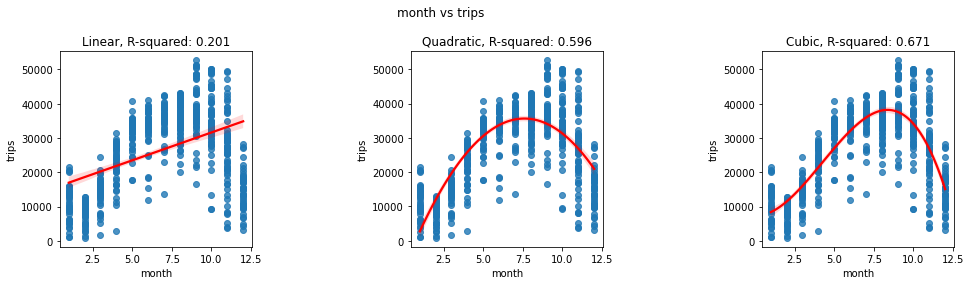

In [15]:
testPolynomials(weekdays, 'month', 'trips')

--> The cubic fits the data very nicely visually, and the R-squared value supports that since it's the highest among the 3. So it is safe to say that the data fits a cubic and it does not overfit the data.

c) Repeat b) to determine appropriate degree polynomials for modeling the relationship between trips and the other inputs: temperature (pick one), snow (also pick one) and precipitation (i.e., trips ~ temperature, trips ~ snow, and trips ~precipitation). Justify your choices and include comment on your code. (Note: your polynomials can have different degrees for different features) [16pts]


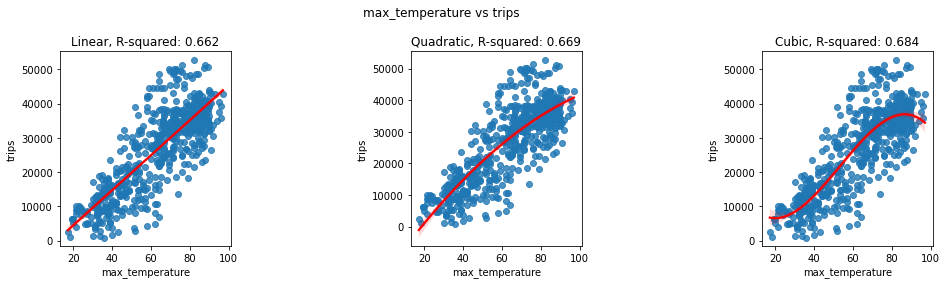

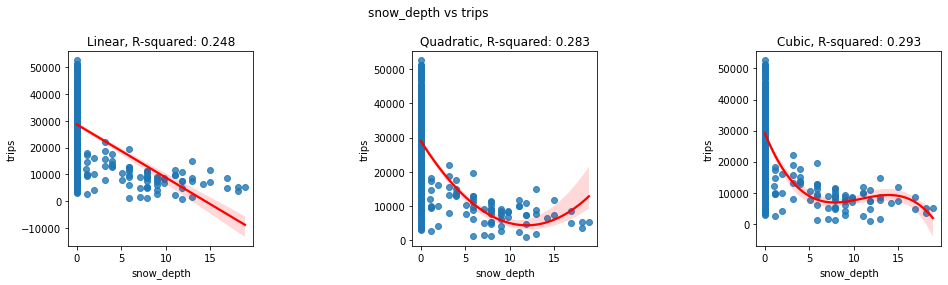

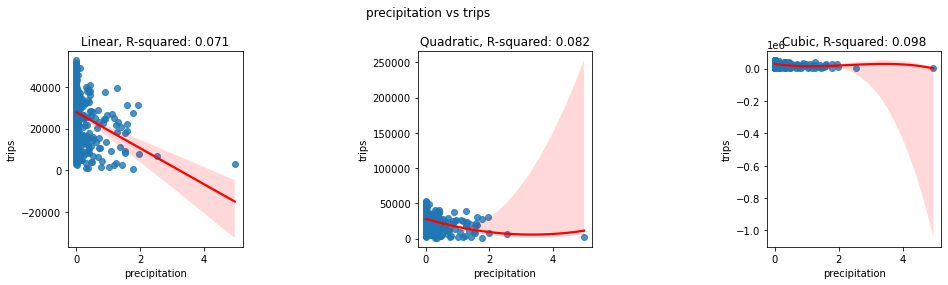

In [16]:
features = [
    'max_temperature', 'snow_depth', 'precipitation'
]

for feature in features:
    testPolynomials(weekdays, feature, 'trips')

--> Based on the R-squared values, they should all be modeled with a cubic and it does not seem to overfit any of the data.

d) Repeat 5)c) with the weekends dataset. Do you notice any differences? Justify your choices and include comment on your code. [10pts]

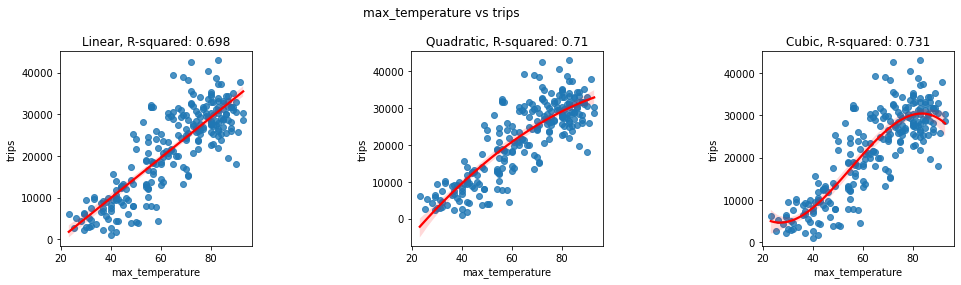

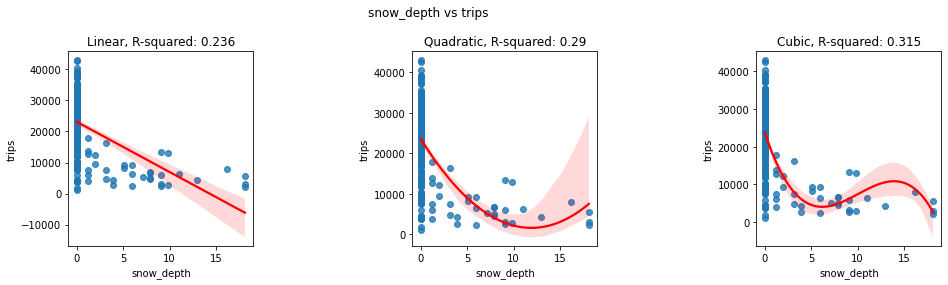

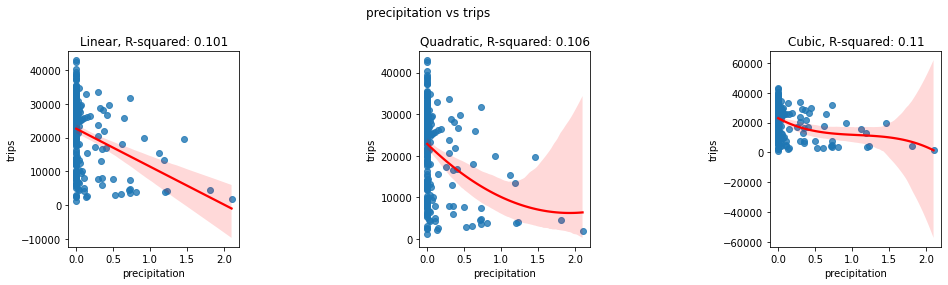

In [17]:
for feature in features:
    testPolynomials(weekends, feature, 'trips')

--> I do not see a major difference with the weekends dataset, since the distribution of points for each feature is similar to the weekdays dataset.